# Example how to use imageProcessing module

The goal of the image module is to import and preprocess images. 

In [7]:
import os
import sys
import numpy as np
import skimage

%load_ext autoreload
%autoreload 2

# TO CHANGE
# absolute path to ACCAL/ACCAL folder 
accalPath = r"D:\Stage\ACCAL\ACCAL"
sys.path.append(accalPath)


# absolute path to data
dataPath = r"D:\Stage\ACCAL\data\dataTest1"
dataList = sorted(os.listdir(dataPath))
img1Path = os.path.join(dataPath,dataList[0]) ## choose any image id you want from the data


import modules.imageProcessing
import matplotlib.pyplot as plt
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
dataFolderPath = Path(r"D:\Stage\ACCAL\data\dataTest1")

modules.imageProcessing.computeAndSaveTempImages(dataFolderPath=dataFolderPath,denoiseRatio=0.1,clipLimit=0.01)

In [57]:
dataFolderPath = Path(r"D:\Stage\ACCAL\data\dataTest1")

pathToSaveTo = Path(dataFolderPath,"temp")
pathCroppedImages = Path(pathToSaveTo,"croppedImages")
pathProcessedImages = Path(pathToSaveTo,"processedImages")


## if the Path does not exist create it :
if pathToSaveTo.exists() == False:
    pathToSaveTo.mkdir()
    
if pathCroppedImages.exists() == False:
    pathCroppedImages.mkdir()
    
if pathProcessedImages.exists() == False:
    pathProcessedImages.mkdir()
    



pathList = list(dataFolderPath.glob("*.jpg"))

for path in pathList:

    name = path.stem

    imgC = modules.imageProcessing.cropToCoin(str(path))
    imgP = modules.imageProcessing.processImage(imgC,denoiseRatio=0.1,clipLimit=0.01)
    

    savePathC = Path(pathCroppedImages,name+".png")
    plt.imsave(savePathC,imgC)

    savePathP = Path(pathProcessedImages,name+".png")
    plt.imsave(savePathP,imgP)

    

## Crop to coin function

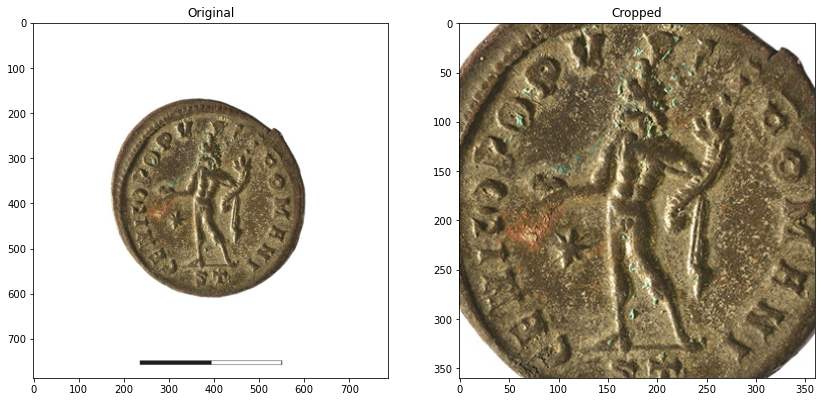

In [4]:
fig,axes = plt.subplots(1,2,figsize=(14,7))
ax1,ax2 = axes

ax1.set_title("Original")
ax1.imshow(plt.imread(img1Path))

img = modules.imageProcessing.cropToCoin(img1Path)
ax2.set_title("Cropped")
ax2.imshow(img)
plt.show()

## processImage function

### Denoise 1
the denoise threshoold can be adjusted 

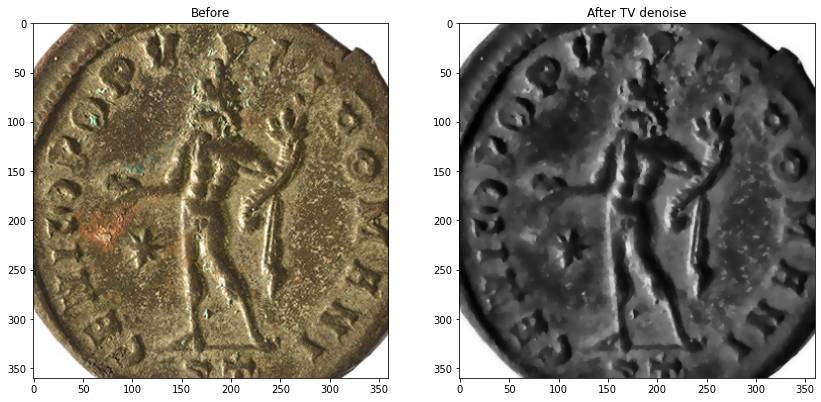

In [5]:
fig,axes = plt.subplots(1,2,figsize=(14,7))
ax1,ax2 = axes

ax1.set_title("Before")
ax1.imshow(img)

import cv2
#gray transformation
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


imgTV = skimage.restoration.denoise_tv_chambolle(gray,0.1)

ax2.set_title("After TV denoise")
ax2.imshow(imgTV,cmap='gray')
plt.show()

### Constrast 

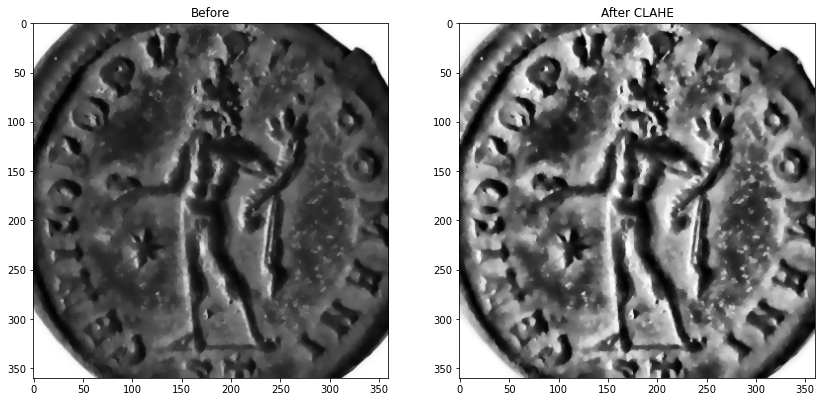

In [6]:
fig,axes = plt.subplots(1,2,figsize=(14,7))
ax1,ax2 = axes

ax1.set_title("Before")
ax1.imshow(imgTV,cmap='gray')


imgCtr = skimage.exposure.equalize_adapthist(imgTV, clip_limit=0.01)

#imgCtr = Image.processing.contrastFilter(imgTV,10.0)
ax2.set_title("After CLAHE")
ax2.imshow(imgCtr,cmap='gray')
plt.show()

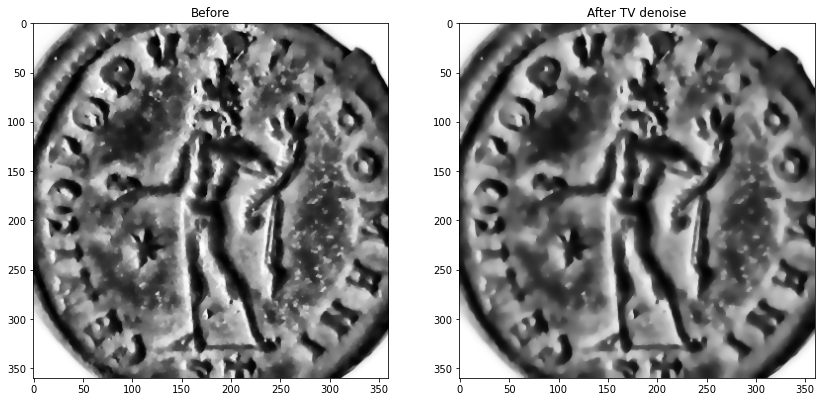

In [7]:
fig,axes = plt.subplots(1,2,figsize=(14,7))
ax1,ax2 = axes

ax1.set_title("Before")
ax1.imshow(imgCtr,cmap='gray')



imgTV2 = skimage.restoration.denoise_tv_chambolle(imgCtr,0.1)
ax2.set_title("After TV denoise")
ax2.imshow(imgTV2,cmap='gray')
plt.show()

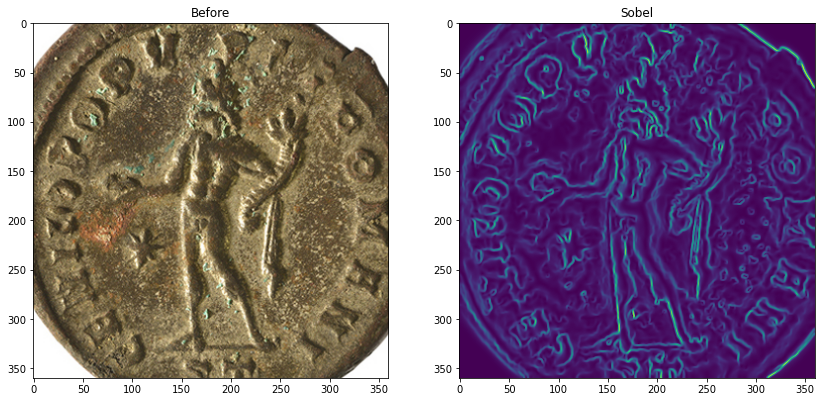

In [8]:
fig,axes = plt.subplots(1,2,figsize=(14,7))
ax1,ax2 = axes

ax1.set_title("Before")
ax1.imshow(img)

#imgL = np.abs(skimage.filters.laplace(imgTV2))
skimage.filters.sobel
imgL = skimage.filters.sobel(imgTV2)
ax2.set_title("Sobel")
ax2.imshow(imgL)
plt.show()

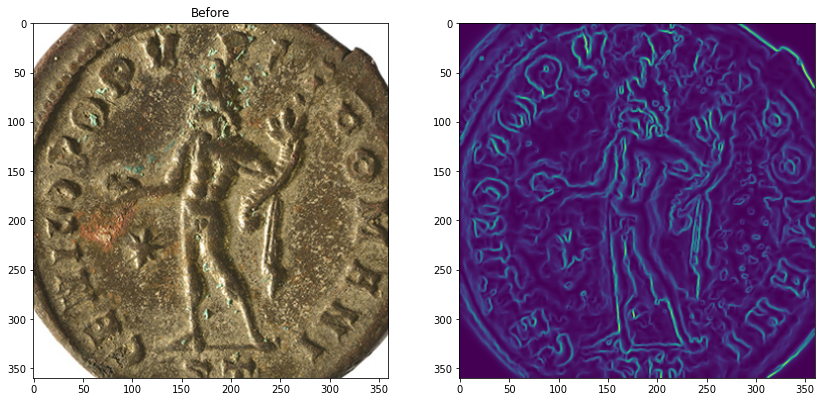

In [11]:
fig,axes = plt.subplots(1,2,figsize=(14,7))
ax1,ax2 = axes

ax1.set_title("Before")
ax1.imshow(img)

## integrated function
imgPro = modules.imageProcessing.processImage(img,denoiseRatio=0.1,clipLimit=0.01)
ax2.imshow(imgPro)
plt.show()



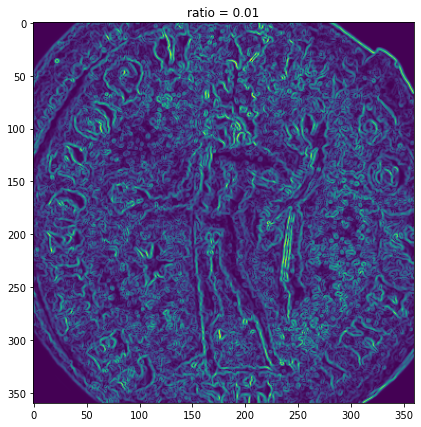

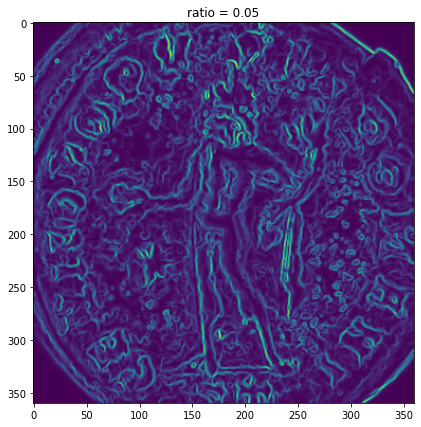

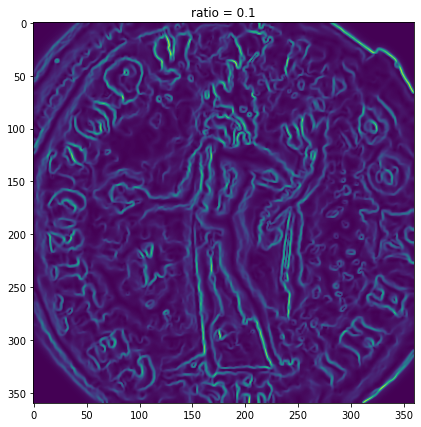

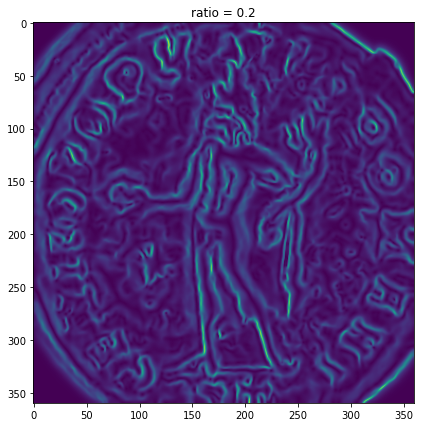

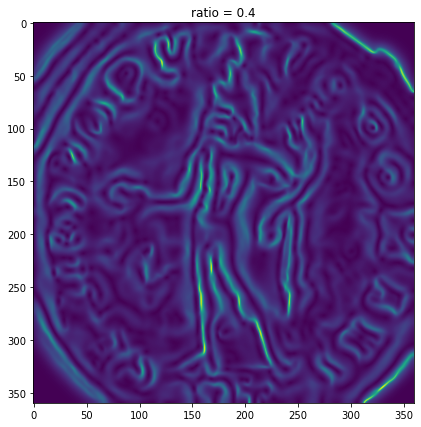

In [13]:
for ratio in [0.01,0.05,0.1,0.2,0.4]:
    plt.figure(figsize=(14,7))
    plt.imshow(modules.imageProcessing.processImage(img,denoiseRatio=ratio,clipLimit=0.01))
    plt.title(f"ratio = {ratio}")